In [2]:
#Description: Predict the future price of the S&P500

In [4]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.style.use('fivethirtyeight')

In [17]:
#Load the data

import yfinance as yf

snp = yf.Ticker('SNP')

hist = snp.history(start= '2020-01-01', end='2022-01-31')
hist1 = hist.copy()

In [20]:
#Store the data
df = pd.DataFrame(hist1)

#Set the date as the index
#df = df.set_index(pd.DatetimeIndex(df['Date'].values))

#Show the data
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-31,50.376808,50.806948,50.351506,50.731041,167400,0.0,0
2020-01-02,51.043097,51.633484,50.806944,51.633484,201100,0.0,0
2020-01-03,51.759993,52.021450,51.582877,51.886505,183000,0.0,0
2020-01-06,52.164829,52.476893,52.063621,52.249172,193600,0.0,0
2020-01-07,52.038322,52.122662,51.684089,52.004585,194000,0.0,0
...,...,...,...,...,...,...,...
2022-01-24,51.389999,51.910000,50.900002,51.830002,200800,0.0,0
2022-01-25,51.790001,52.810001,51.040001,52.720001,160200,0.0,0
2022-01-26,52.599998,52.849998,51.759998,51.990002,168200,0.0,0


In [21]:
#Plot the linear regression line and the close price

df3 = df.copy()

#Create a new column called 'Numbers' that ranges from 0 to the lenght of the data set
df3['Numbers'] = list(range(0, len(df3)))

#Store the 'Numbers' column into a variable called 'X' as an array
X= np.array(df3[['Numbers']])

#Store the close price as an array ina variable called 'y'
y =  df3['Close'].values

#Create and train the model
lin_model = LinearRegression().fit(X,y)
print('Intercept:', lin_model.intercept_)
print('Slope:', lin_model.coef_)

Intercept: 40.095235617915804
Slope: [0.01732184]


Text(0.5, 1.0, 'Close Price History')

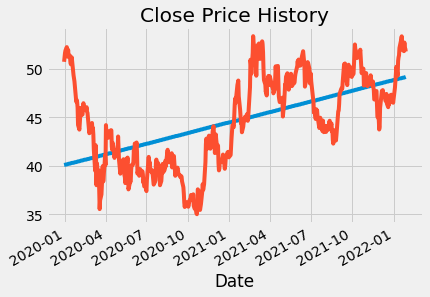

In [22]:
#Prepare data for visualisation
#Get predicted price from the model and store them into variable called 'y_pred'
y_pred = lin_model.coef_ * X + lin_model.intercept_ #y = mx + b

#Store the predicted values in a new column called 'Pred'
df3['Pred'] = y_pred

#Plot the data
df3['Pred'].plot()
df3['Close'].plot()
plt.title('Close Price History')


In [24]:
#How good is the model?
r2_score(df3['Close'], df3['Pred'])


0.3067256969409633

In [25]:
#Show the possible price for the next day based on the model
lin_model.coef_ * len(df3) + 1 + lin_model.intercept_

array([50.18920179])